In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fit(x, y, sigma):
    ATCA = np.ones((2, 2))
    s = sigma**2
    ATCA[0][0] = sum(1/s)
    ATCA[0][1] = sum(x/s)
    ATCA[1][0] = sum(x/s)
    ATCA[1][1] = sum(x**2/s)
    inv = np.ones((2,2))
    det = ATCA[0][0]*ATCA[1][1] - ATCA[0][1]*ATCA[1][0]
    inv[0][0] = ATCA[1][1]/det
    inv[0][1] = -ATCA[0][1]/det
    inv[1][0] = -ATCA[1][0]/det
    inv[1][1] = ATCA[0][0]/det
    ATCY = np.ones((2,1))
    ATCY[0][0] = sum(y/s)
    ATCY[1][0] = sum(x*y/s)
    return np.matmul(inv, ATCY), inv

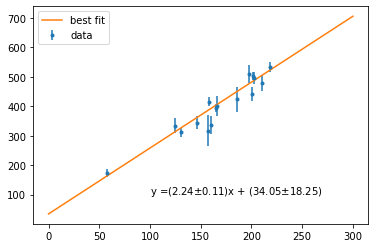

In [3]:
datax, datay, sigmay, sigmax, rhoxy = np.loadtxt('data.txt', unpack = True)

plt.figure()
plt.errorbar(datax[4:], datay[4:], yerr = sigmay[4:], fmt ='.', label = 'data')
para = fit(datax[4:], datay[4:], sigmay[4:])
x = np.linspace(0, 300, 100)
plt.plot(x, para[0][1]*x + para[0][0], label = 'best fit')
plt.text(100, 100, f'y =' + '(' + str(round(float(para[0][1]), 2)) + '$\pm$' + 
         str(round(para[1][1][1]**0.5, 2)) + ')' + 'x + ' + '(' + str(round(float(para[0][0]), 2)) + 
                   '$\pm$' + str(round(para[1][0][0]**0.5, 2)) + ')')
plt.legend()

The standard uncertainty of the slope of the fit is $\sigma_m^2 = 0.107^2 = 0.012$ 

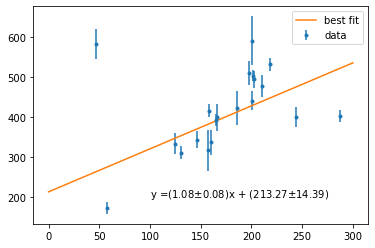

In [4]:
plt.figure()
plt.errorbar(datax, datay, yerr = sigmay, fmt = '.', label = 'data')
para2 = fit(datax, datay, sigmay)
plt.plot(x, para2[0][1]*x + para2[0][0], label = 'best fit')
plt.text(100, 200, f'y =' + '(' + str(round(float(para2[0][1]), 2)) + '$\pm$' + 
         str(round(para2[1][1][1]**0.5, 2)) + ')' + 'x + ' + '(' + str(round(float(para2[0][0]), 2)) + 
                   '$\pm$' + str(round(para2[1][0][0]**0.5, 2)) + ')')
plt.legend()

The standard uncertainty of the slope of the fit is $\sigma_m^2 = 0.077^2 = 0.006$ 

The new data points lie far away from the old set of data points which changes the fitted parameters significantly. The best fit values also deviates from some of the data points by several $\sigma_{yi}$. Which makes the linear fit looks like a "poor" fit of the data at hand.

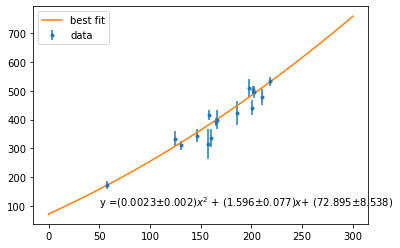

In [5]:
def fit2(x, y, sigma):
    s = sigma**2
    ATCA = np.ones((3, 3))
    ATCA[0][0] = sum(1/s)
    ATCA[0][1] = sum(x/s)
    ATCA[0][2] = sum(x**2/s)
    ATCA[1][0] = sum(x/s)
    ATCA[1][1] = sum(x**2/s)
    ATCA[1][2] = sum(x**3/s)
    ATCA[2][0] = sum(x**2/s)
    ATCA[2][1] = sum(x**3/s)
    ATCA[2][2] = sum(x**4/s)
    inv = np.linalg.inv(ATCA)
    ATCY = np.ones((3, 1))
    ATCY[0][0] = sum(y/s)
    ATCY[1][0] = sum(x*y/s)
    ATCY[2][0] = sum((x**2)*y/s)
    return np.matmul(inv, ATCY), inv

plt.figure()
plt.errorbar(datax[4:], datay[4:], yerr = sigmay[4:], fmt ='.', label = 'data')
para3 = fit2(datax[4:], datay[4:], sigmay[4:])
plt.plot(x, para3[0][2]*x**2 + para3[0][1]*x + para3[0][0], label = 'best fit')
plt.text(50, 100, f'y =' + '(' + str(round(float(para3[0][2]), 4)) + '$\pm$' + 
         str(round(para3[1][2][2]**0.5, 4)) + ')' + '$x^2$ + ' + '(' + str(round(float(para3[0][1]), 3)) + 
                   '$\pm$' + str(round(para2[1][1][1]**0.5, 3)) + ')' + '$x$' + '+ (' + str(round(float(para3[0][0]), 3)) 
                            + '$\pm$' + str(round(para3[0][0][0]**0.5, 3)) + ')')
plt.legend()

The standard uncertainty of the slope of the fit is $\sigma_m^2 = 0.002033^2 = 0.000004$ 

In [46]:
mi = []
for i in range(len(datax)):
    mi.append(fit(np.append(datax[:i], datax[i+1:]) , np.append(datay[:i], datay[i+1:]), 
                  np.append(sigmay[:i], sigmay[i+1:]))[0][1])

m = sum(mi)/20
sigmam = (19/20)*sum((mi - m)**2)
print('The jackknife estimated uncertainty is', sigmam )

M = 20
mj = []
for j in range(M):
    
    
    jkx = np.array([])
    jky = np.array([])
    jks = np.array([])
    for i in range(20):
        index = np.random.randint(0, 20)
        jkx = np.append(jkx,datax[index])
        jky = np.append(jky,datay[index])
        jks = np.append(jks,sigmay[index])
    mj.append(fit(jkx, jky, jks)[0][1])

sigmam2 = sum((mj - para2[0][1])**2)/M
print('The bootstrap estimated uncertainty is', sigmam2)

The jackknife estimated uncertainty is [0.76394608]
The bootstrap estimated uncertainty is [0.33918433]


The standard uncertainty of the slope of the fit obtained by the standard fit is $\sigma_m^2 = 0.077^2 = 0.006$.

The jackknife estimated uncertainty $\sigma_m^2 = 0.764$.

The bootstrap estimated uncertainty $\sigma_m^2 = 0.339$ (changes slightly every computation due to random number generator).

Given the data and unvertainties at hand, the bootstrap estimated uncertainty seems most reasonable.